# 🧑‍💼 Customer Behavior Analysis - Olist E-Commerce Dataset

In this notebook, we explore how customers interact with the platform:
- How long do customers wait for orders?
- Which regions do most customers belong to?
- Are there repeat customers?

We’ll analyze `customer_wait_time`, `customer_state`, and `customer_unique_id`.


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("data.csv")

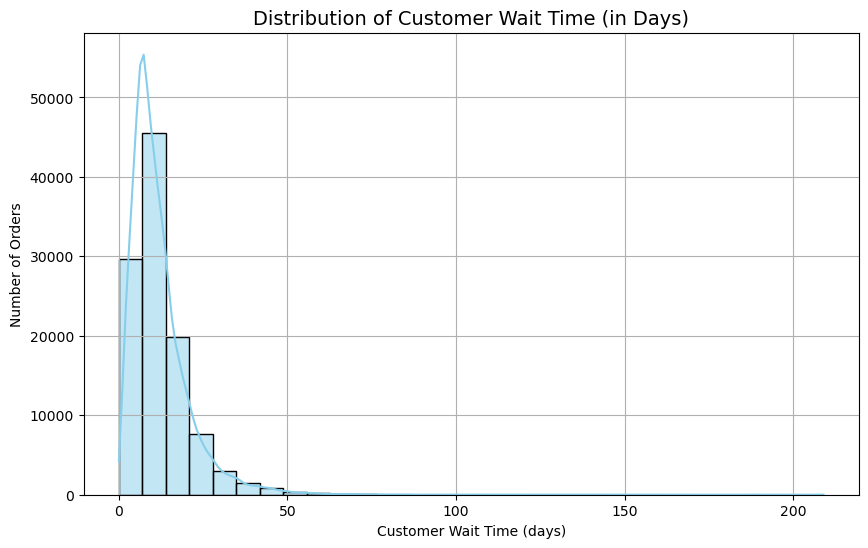

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['customer_wait_time'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Customer Wait Time (in Days)', fontsize=14)
plt.xlabel('Customer Wait Time (days)')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()


## ⏱️ Customer Wait Time Distribution

We analyze how many days customers typically wait for their orders to be delivered. 

- The column `customer_wait_time` was calculated as:
  
  \[
  \text{customer_wait_time} = \text{order_delivered_customer_date} - \text{order_purchase_timestamp}
  \]

- A shorter wait time generally means better customer satisfaction.
- Peaks in the histogram may indicate popular delivery ranges (e.g., within a week).

Let’s now visualize it to understand the distribution.


C:\Users\vrush\AppData\Local\Temp\ipykernel_22308\2093646033.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_wait_times.index, y=state_wait_times.values, palette='viridis')


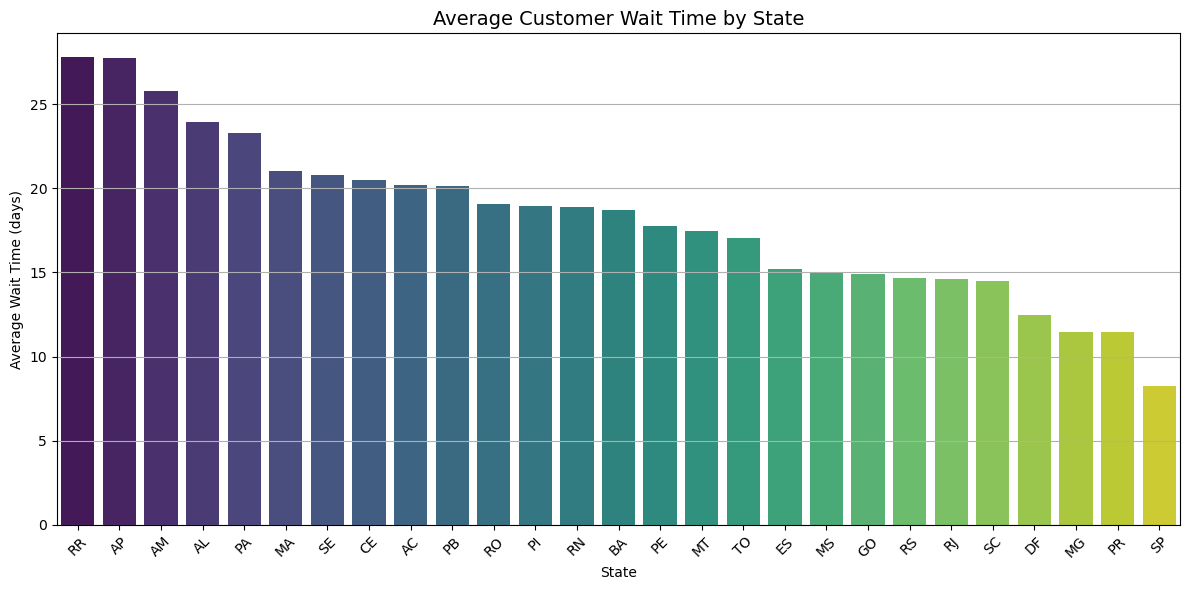

In [5]:
# Grouping by customer state and calculating average wait time
state_wait_times = df.groupby('customer_state')['customer_wait_time'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12,6))
sns.barplot(x=state_wait_times.index, y=state_wait_times.values, palette='viridis')
plt.title('Average Customer Wait Time by State', fontsize=14)
plt.xlabel('State')
plt.ylabel('Average Wait Time (days)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## 🗺️ Average Customer Wait Time by State

This bar chart shows the **average number of days customers wait** for delivery, grouped by state.

- States with longer wait times may indicate logistical challenges or lack of nearby sellers.
- Helps in identifying areas that may benefit from warehouse optimization or better delivery partners.

This is important for customer experience analysis and operational decision-making.


C:\Users\vrush\AppData\Local\Temp\ipykernel_22308\3366652772.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=late_deliveries_state.index, y=late_deliveries_state.values, palette='magma')


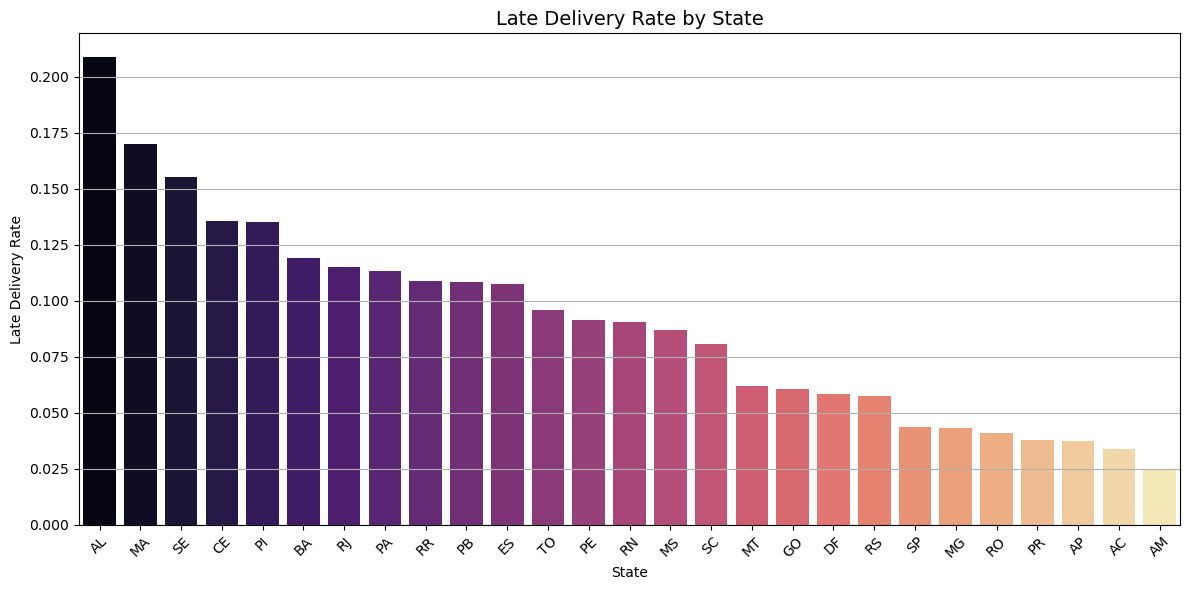

In [6]:

late_deliveries_state = df.groupby('customer_state')['is_late'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=late_deliveries_state.index, y=late_deliveries_state.values, palette='magma')
plt.title('Late Delivery Rate by State', fontsize=14)
plt.xlabel('State')
plt.ylabel('Late Delivery Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## 🕓 Late Delivery Rate by State

This plot shows the **proportion of orders delivered late**, grouped by customer state.

- Regions with higher late delivery rates may indicate issues with logistics, carrier inefficiency, or long-distance shipments.
- Businesses can use this insight to optimize regional delivery networks or improve seller performance in specific areas.


In [7]:
# Calculate shipping time = carrier pickup to delivery to customer
df['shipping_time'] = (
    pd.to_datetime(df['order_delivered_customer_date']) - 
    pd.to_datetime(df['order_delivered_carrier_date'])
).dt.days


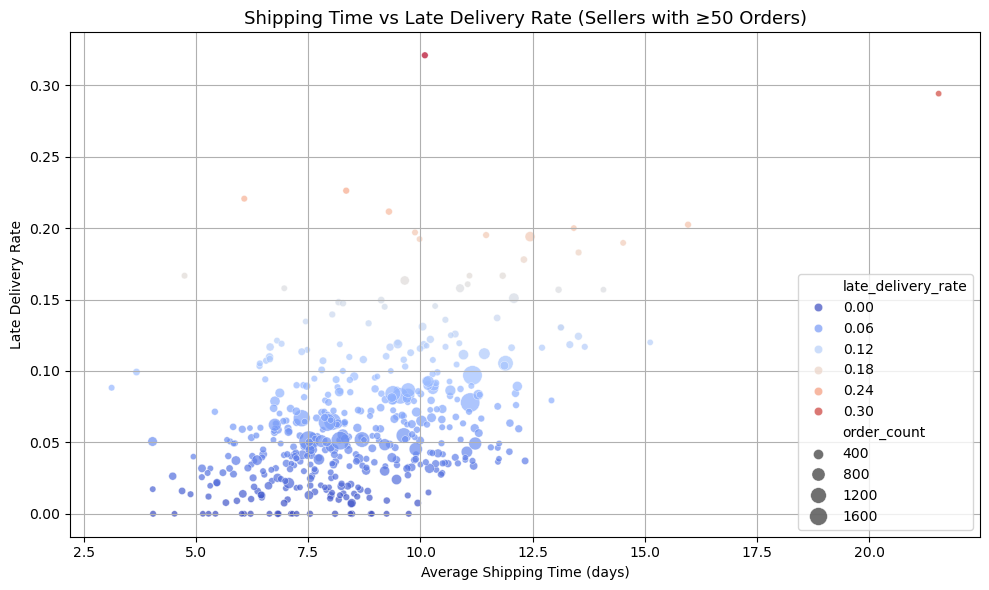

In [8]:
shipping_vs_late = df.groupby('seller_id').agg(
    avg_shipping_time=('shipping_time', 'mean'),
    late_delivery_rate=('is_late', 'mean'),
    order_count=('order_id', 'count')
).reset_index()

shipping_vs_late = shipping_vs_late[shipping_vs_late['order_count'] >= 50]

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=shipping_vs_late,
    x='avg_shipping_time',
    y='late_delivery_rate',
    size='order_count',
    hue='late_delivery_rate',
    palette='coolwarm',
    sizes=(20, 200),
    alpha=0.7
)
plt.title('Shipping Time vs Late Delivery Rate (Sellers with ≥50 Orders)', fontsize=13)
plt.xlabel('Average Shipping Time (days)')
plt.ylabel('Late Delivery Rate')
plt.grid(True)
plt.tight_layout()
plt.show()


## ⏱️ Fast Shipping vs Late Delivery

We calculated `shipping_time` as the number of days between when the seller shipped the order and when it was delivered to the customer.

This scatter plot explores the relationship between **average shipping time** and **late delivery rate** for sellers with ≥50 orders.

- Dots are colored by late delivery rate.
- Larger dots = more orders.
- Key Insight: Sellers who ship faster usually have lower late delivery rates.


In [9]:
reviews = pd.read_csv('olist_order_reviews_dataset.csv')

reviews = reviews[['order_id', 'review_score']]

df = df.merge(reviews, on='order_id', how='left')


In [10]:
wait_vs_score = df.groupby(df['customer_wait_time'].round()).agg(
    avg_review_score=('review_score', 'mean'),
    order_count=('order_id', 'count')
).reset_index().rename(columns={'customer_wait_time': 'wait_time_rounded'})


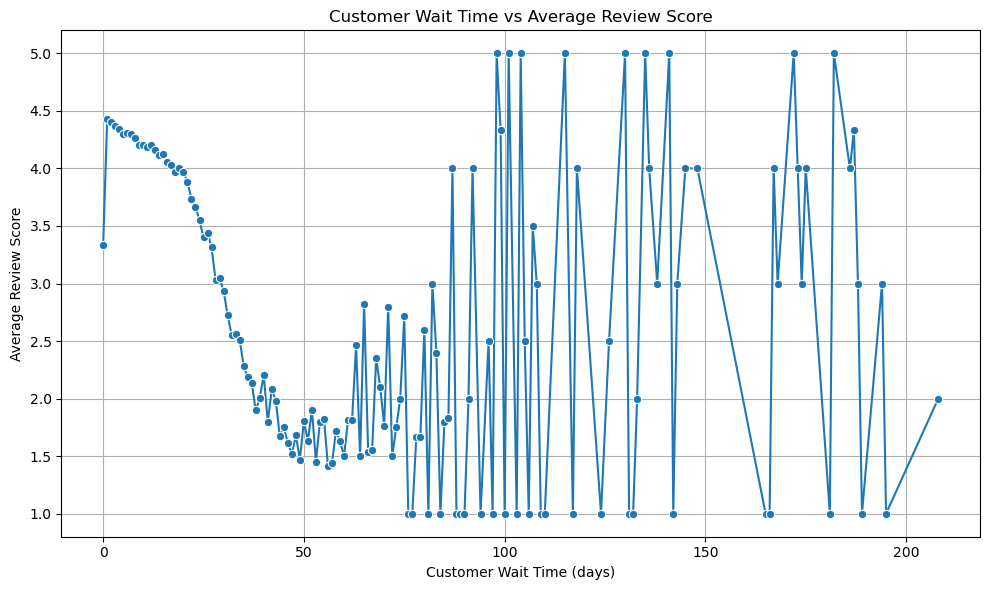

In [11]:
plt.figure(figsize=(10,6))
sns.lineplot(data=wait_vs_score, x='wait_time_rounded', y='avg_review_score', marker='o')
plt.title('Customer Wait Time vs Average Review Score')
plt.xlabel('Customer Wait Time (days)')
plt.ylabel('Average Review Score')
plt.grid(True)
plt.tight_layout()
plt.show()


## 🕒 Customer Wait Time vs Review Score

This chart shows how customer satisfaction (measured by review score) changes with wait time.

- Wait time = number of days between purchase and delivery.
- Scores tend to drop as wait time increases, especially after a threshold.
- Indicates that faster delivery not only reduces complaints but also boosts customer satisfaction.
